## Credit Card Fraud Detection V2

### Deep Learning Style

#### Alex Martishius

In [1]:
#Packages
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from tabulate import tabulate
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
#working dir
os.chdir('C:\\Users\\alexm\\Desktop\\Kaggle')
#import data
raw_ds = pd.read_csv('creditcard.csv')

In [3]:
#Quick describe
raw_ds.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
#train/test/va split;
#Define the master X and y by selecting out the response variable and dropping it for X

#First drop 'time' because it is not relevant;
raw=raw_ds.drop(columns=['Time'])
#split into X and y
y = raw[['Class']]
X = raw.drop(columns=['Class'])

#If we want train/validation/test, we need 2 calls to train_test_split
#This one splits into 80% train & 20% test.
Xtr, Xte, ytr, yte=train_test_split(X, y, test_size=0.2, random_state=19)
#This one splits into 80*75% train (60%) & 80*25% (20%) validation
Xtr, Xva, ytr, yva=train_test_split(Xtr, ytr, test_size=0.25, random_state=19)

In [4]:
#No need to standardize - inputs are already principal components;
#Shape of training set
print("Xtr shape:",Xtr.shape)
print("ytr shape:",ytr.shape)

#Shape of validaiton set
print("Xva shape:",Xva.shape)
print("yva shape:",yva.shape)

#Shape of testing set
print("Xte shape:",Xte.shape)
print("yte shape:",yte.shape)

Xtr shape: (170883, 29)
ytr shape: (170883, 1)
Xva shape: (56962, 29)
yva shape: (56962, 1)
Xte shape: (56962, 29)
yte shape: (56962, 1)


In [5]:
#The benchmark is the "best" logistic regression model:  C=0.38 and W = {0:11,1:89}
c=0.38
w = {0:11,1:89}

clf = LogisticRegression(penalty='l2',class_weight=w,C=c,solver='lbfgs',max_iter=1500).fit(Xtr, ytr)
ypreds = clf.predict(Xte)

f1 = f1_score(yte,ypreds)
prec = precision_score(yte,ypreds)
acc = accuracy_score(yte,ypreds)
rec = recall_score(yte,ypreds)
auc = roc_auc_score(yte,ypreds)

logit_stats = ['Wtd Logistic',acc,auc,prec,rec,f1]
table_headers = ['Model','Acc','AUC','Precision','Recall','F1 Score']

print(tabulate([logit_stats], headers=table_headers, tablefmt='orgtbl'))

C:\Users\alexm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


| Model        |      Acc |      AUC |   Precision |   Recall |   F1 Score |
|--------------+----------+----------+-------------+----------+------------|
| Wtd Logistic | 0.999368 | 0.914833 |    0.813725 |     0.83 |   0.821782 |


In [6]:
def fraud_impact(amounts,yhat,y,falcost=0,show=False,bring=True):
    total_amt = np.sum(amounts)
    total_fraud = np.sum(amounts*y)
    recalled_fraud = np.sum(amounts*y*yhat)
    slipped_fraud = total_fraud-recalled_fraud
    false_positive_cost = np.sum((yhat*(1-y))*falcost)
    recall_percentage = recalled_fraud/total_fraud
    value = recalled_fraud-false_positive_cost
    
    table_headers = ['Total Trans','Total Fraud','Recalled Fraud','Slipped Fraud','Recall %','FalsePos Cost','Value Added']
    table_values = [total_amt,total_fraud,recalled_fraud,slipped_fraud,recall_percentage,false_positive_cost,value]
    
    if show:
        print(tabulate([table_values], headers=table_headers, tablefmt='orgtbl'))
    if bring:
        return table_values
    else:
        return
    
dollar_imp = pd.DataFrame(columns=['Amount','Predicted','Actual'])
dollar_imp[['Amount']]=Xte[['Amount']]
dollar_imp[['Predicted']]=ypreds
dollar_imp[['Actual']]=yte
dollar_imp.reset_index(drop=True,inplace=True)

amt = np.array(dollar_imp[['Amount']])
preds = np.array(dollar_imp[['Predicted']])
acts = np.array(dollar_imp[['Actual']])

fraud_impact(amt,preds,acts,falcost=50,show=True,bring=False)

|   Total Trans |   Total Fraud |   Recalled Fraud |   Slipped Fraud |   Recall % |   FalsePos Cost |   Value Added |
|---------------+---------------+------------------+-----------------+------------+-----------------+---------------|
|   5.02639e+06 |       13238.9 |          10287.8 |         2951.01 |   0.777095 |             950 |       9337.84 |


In [7]:
#Now I want to try and improve with basic deep learning.
#First drop 'amount' because it causes exploding gradient.
nXtr = Xtr.drop(columns=['Amount'])
nXva = Xva.drop(columns=['Amount'])
nXte = Xte.drop(columns=['Amount'])
#Transpose and cast to numpy arrays so the neural net will work.
nnXtr = np.array(nXtr).T
nnXte = np.array(nXte).T
nnytr = np.array(ytr).T
nnyte = np.array(yte).T
nnXva = np.array(nXva).T
nnyva = np.array(yva).T

print("Xtr shape: ",nnXtr.shape)
print("ytr shape: ",nnytr.shape)
print("Xva shape: ",nnXva.shape)
print("yva shape: ",nnyva.shape)
print("Xte shape: ",nnXte.shape)
print("yte shape: ",nnyte.shape)

Xtr shape:  (28, 170883)
ytr shape:  (1, 170883)
Xva shape:  (28, 56962)
yva shape:  (1, 56962)
Xte shape:  (28, 56962)
yte shape:  (1, 56962)


In [92]:
#Helper functions for nn.
#NN-from-scratch functions;
#Helper Functions
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    Arguments:
    Z -- numpy array of any shape
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z):
    """
    Implement the RELU function.
    Arguments:
    Z -- Output of the linear layer, of any shape
    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    A = np.maximum(0,Z)
    assert(A.shape == Z.shape)
    cache = Z 
    return A, cache

def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    # When z <= 0, set dz to 0 as well. 
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(1)
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters     

def initialize_parameters_deep(layers_dims,init):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    initialization = init
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1,L):
        if initialization=='zeros':
            parameters['W' + str(l)] = np.zeros((layers_dims[l],layers_dims[l-1]))
            parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        elif initialization=='random':
            parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*0.1
            parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        elif initialization=='he':
            parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(2./layers_dims[l-1])
            parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        elif initialization[0]=='custom':
            parameters=initialization[1]
        else:
            print('init method does not match known methods')
            return
    return parameters
            

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.
    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    Z = W.dot(A) + b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer
    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    return A, cache

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    assert(AL.shape == (1,X.shape[1]))      
    return AL, caches

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).
    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)
    Returns:
    cost -- cross-entropy cost
    """
    m = Y.shape[1]
    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    return cost

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)
    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)    
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                the cache of linear_activation_forward() with "sigmoid" (there is one, index L-1)
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    L = len(parameters) // 2 # number of layers in the neural network
    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]  
    return parameters

def predict(X, y, parameters,threshold=0.5):
    """
    This function is used to predict the results of a  L-layer neural network.
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    Returns:
    p -- predictions for the given dataset X
    """
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > threshold:
            p[0,i] = 1
        else:
            p[0,i] = 0
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
    return p
    
    #Model Function
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False,dynamic_lr=False,init='random'):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims,init)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        
        #Dynamic Learning Rate:
        if dynamic_lr ==True:
            if float(num_iterations)*0.2==i:
                learning_rate=learning_rate*0.7
                print("LR reduced 1x")
            if float(num_iterations)*0.4==i:
                learning_rate=learning_rate*0.8
                print("LR reduced 2x")
            if float(num_iterations)*0.6==i:
                learning_rate=learning_rate*0.9
                print("LR reduced 3x")
            if float(num_iterations)*0.8==i:
                learning_rate=learning_rate*0.95
                print("LR reduced 4x")

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters


In [9]:
print(nnXtr.shape)
print(nnytr.shape)

(28, 170883)
(1, 170883)


Cost after iteration 0: 0.254461
Cost after iteration 100: 0.252886
Cost after iteration 200: 0.251330
Cost after iteration 300: 0.249792
Cost after iteration 400: 0.248272
Cost after iteration 500: 0.246770
Cost after iteration 600: 0.245286
Cost after iteration 700: 0.243819
Cost after iteration 800: 0.242369
Cost after iteration 900: 0.240935
Cost after iteration 1000: 0.239518
Cost after iteration 1100: 0.238117
Cost after iteration 1200: 0.236732
Cost after iteration 1300: 0.235362
Cost after iteration 1400: 0.234008
Cost after iteration 1500: 0.232669
Cost after iteration 1600: 0.231344
Cost after iteration 1700: 0.230035
Cost after iteration 1800: 0.228739
Cost after iteration 1900: 0.227458


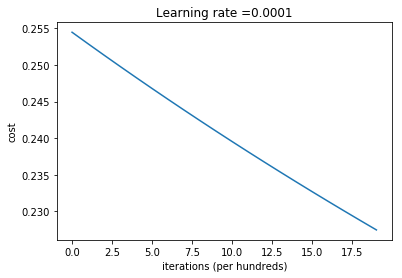

In [58]:
#First let's try 1 hidden layer.
#The first dimension has to be 28 to match the width of Xtr.
layers_dims = [28, 10, 1]
param_nn6 = L_layer_model(nnXtr, nnytr, layers_dims, num_iterations = 2000, learning_rate = .0001, print_cost = True, dynamic_lr=False,init=['custom',param_nn5])

In [59]:
#In-sample performance
predictions_test = predict(nnXtr, nnytr, param_nn4)
ypreds=predictions_test.T
print(ypreds.shape)
print(np.sum(ypreds))
print(np.sum(nnytr))


Accuracy: 0.9977118847398512
(170883, 1)
77.0
314


In [60]:
#out-of-sample performance
predictions_test2 = predict(nnXva,nnyva,param_nn4)
ypreds=predictions_test2.T
print(ypreds.shape)
print(np.sum(ypreds))
print(np.sum(nnyva))

Accuracy: 0.998174221410765
(56962, 1)
26.0
78


In [61]:
yvanp = np.array(yva)
f1 = f1_score(yvanp,ypreds)
prec = precision_score(yvanp,ypreds)
acc = accuracy_score(yvanp,ypreds)
rec = recall_score(yvanp,ypreds)
auc = roc_auc_score(yvanp,ypreds)

nn_stats = ['1-Layer FC',acc,auc,prec,rec,f1]
table_headers = ['Model','Acc','AUC','Precision','Recall','F1 Score']

print(tabulate([nn_stats], headers=table_headers, tablefmt='orgtbl'))

| Model      |      Acc |      AUC |   Precision |   Recall |   F1 Score |
|------------+----------+----------+-------------+----------+------------|
| 1-Layer FC | 0.998174 | 0.499771 |           0 |        0 |          0 |


Cost after iteration 0: 0.049330
Cost after iteration 100: 0.047488
Cost after iteration 200: 0.045810
Cost after iteration 300: 0.044277
Cost after iteration 400: 0.042873
Cost after iteration 500: 0.041585
Cost after iteration 600: 0.040399
Cost after iteration 700: 0.039304
Cost after iteration 800: 0.038292
Cost after iteration 900: 0.037355


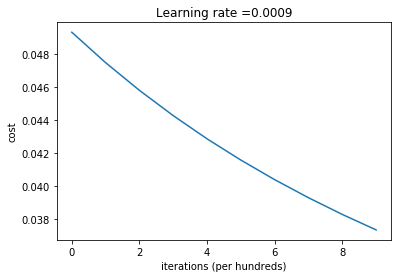

In [81]:
#Looks like this first model is just not capable of learning what it needs to learn.  Let's try a deeper network - 4 hidden layers.
layers_dims = [28,20,15,10,5,1]
param_dnn9 = L_layer_model(nnXtr, nnytr, layers_dims, num_iterations = 1000, learning_rate = .0009, print_cost = True, dynamic_lr=False,init=['custom',param_dnn8])

In [82]:
#In-sample performance
predictions_test = predict(nnXtr, nnytr, param_dnn9)
ypreds=predictions_test.T
print("in-sample performance:")
print(ypreds.shape)
print(np.sum(ypreds))
print(np.sum(nnytr))
yvanp = np.array(ytr)
f1 = f1_score(yvanp,ypreds)
prec = precision_score(yvanp,ypreds)
acc = accuracy_score(yvanp,ypreds)
rec = recall_score(yvanp,ypreds)
auc = roc_auc_score(yvanp,ypreds)

nn_stats = ['FC-4 IS',acc,auc,prec,rec,f1]
table_headers = ['Model','Acc','AUC','Precision','Recall','F1 Score']

print(tabulate([nn_stats], headers=table_headers, tablefmt='orgtbl'))
#out-of-sample performance
predictions_test2 = predict(nnXva,nnyva,param_dnn9)
ypreds=predictions_test2.T
print("OOS performance")
print(ypreds.shape)
print(np.sum(ypreds))
print(np.sum(nnyva))
yvanp = np.array(yva)
f1 = f1_score(yvanp,ypreds)
prec = precision_score(yvanp,ypreds)
acc = accuracy_score(yvanp,ypreds)
rec = recall_score(yvanp,ypreds)
auc = roc_auc_score(yvanp,ypreds)

nn_stats = ['FC-4 OOS',acc,auc,prec,rec,f1]
table_headers = ['Model','Acc','AUC','Precision','Recall','F1 Score']

print(tabulate([nn_stats], headers=table_headers, tablefmt='orgtbl'))

Accuracy: 0.9981624854432566
in-sample performance:
(170883, 1)
0.0
314
| Model   |      Acc |   AUC |   Precision |   Recall |   F1 Score |
|---------+----------+-------+-------------+----------+------------|
| FC-4 IS | 0.998162 |   0.5 |           0 |        0 |          0 |


C:\Users\alexm\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alexm\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.9986306660580737
OOS performance
(56962, 1)
0.0
78
| Model    |      Acc |   AUC |   Precision |   Recall |   F1 Score |
|----------+----------+-------+-------------+----------+------------|
| FC-4 OOS | 0.998631 |   0.5 |           0 |        0 |          0 |


C:\Users\alexm\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\alexm\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
#The data is just too imbalanced...
#Let's try to undersample with "Near Miss 1".
from collections import Counter
from imblearn.under_sampling import NearMiss

In [11]:
nm1 = NearMiss(version=1)

In [12]:
Xtr_resamp, ytr_resamp = nm1.fit_resample(Xtr, ytr)

In [13]:
print("Xtr:",Xtr.shape)
print("ytr:",ytr.shape)
print("Xtr_resamp:",Xtr_resamp.shape)
print("ytr_resamp:",ytr_resamp.shape)

Xtr: (170883, 29)
ytr: (170883, 1)
Xtr_resamp: (628, 29)
ytr_resamp: (628, 1)


In [20]:
#Now we have 628 examples with perfect balance;
ytr_resamp.describe()

,Class
count,628.000000
mean,0.500000
std,0.500399
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [21]:
#I'm going to train it on 628 examples and test it on 56,962 examples.
nXtr = Xtr_resamp.drop(columns=['Amount'])
#Transpose and cast to numpy arrays so the neural net will work.
nnXtr = np.array(nXtr).T
nnytr = np.array(ytr_resamp).T

print("Xtr shape: ",nnXtr.shape)
print("ytr shape: ",nnytr.shape)
print("Xte shape: ",nnXte.shape)
print("yte shape: ",nnyte.shape)

Xtr shape:  (28, 628)
ytr shape:  (1, 628)
Xte shape:  (28, 56962)
yte shape:  (1, 56962)


In [ ]:
#Now we can go much deeper since the data is so small. 7 hidden layers.
layers_dims = [28,20,15,12,10,8,6,4,1]
param_unn = L_layer_model(nnXtr, nnytr, layers_dims, num_iterations = 15000, learning_rate = .0001, print_cost = True, dynamic_lr=True,init='he')

In [39]:
saved_param = param_unn

In [ ]:
param_unn2 = L_layer_model(nnXtr, nnytr, layers_dims, num_iterations = 5000, learning_rate = .00005, print_cost = True, dynamic_lr=True,init=['custom',param_unn])

In [41]:
saved_param = param_unn2

In [ ]:
param_unn3 = L_layer_model(nnXtr, nnytr, layers_dims, num_iterations = 5000, learning_rate = .00005, print_cost = True, dynamic_lr=True,init=['custom',param_unn2])

In [52]:
predictions_test = predict(nnXtr,nnytr,param_unn3)
ypreds=predictions_test.T
yacts = nnytr.T
print("in-sample performance:")
print(ypreds.shape)
print(yacts.shape)
print(np.sum(ypreds))
print(np.sum(yacts))

#In-sample performance
f1 = f1_score(yacts,ypreds)
prec = precision_score(yacts,ypreds)
acc = accuracy_score(yacts,ypreds)
rec = recall_score(yacts,ypreds)
auc = roc_auc_score(yacts,ypreds)

nn_stats = ['FC-US IS',acc,auc,prec,rec,f1]
table_headers = ['Model','Acc','AUC','Precision','Recall','F1 Score']

print(tabulate([nn_stats], headers=table_headers, tablefmt='orgtbl'))


Accuracy: 0.9394904458598726
in-sample performance:
(628, 1)
(628, 1)
322.0
314
| Model    |     Acc |     AUC |   Precision |   Recall |   F1 Score |
|----------+---------+---------+-------------+----------+------------|
| FC-US IS | 0.93949 | 0.93949 |    0.928571 | 0.952229 |   0.940252 |


In [53]:
#out-of-sample performance
predictions_test2 = predict(nnXte,nnyte,param_unn3)
ypreds=predictions_test2.T
yacts = nnyte.T
print("OOS performance")
print(ypreds.shape)
print(yacts.shape)
print(np.sum(ypreds))
print(np.sum(yacts))
f1 = f1_score(yacts,ypreds)
prec = precision_score(yacts,ypreds)
acc = accuracy_score(yacts,ypreds)
rec = recall_score(yacts,ypreds)
auc = roc_auc_score(yacts,ypreds)

nn_stats = ['FC-US OOS',acc,auc,prec,rec,f1]
table_headers = ['Model','Acc','AUC','Precision','Recall','F1 Score']

print(tabulate([nn_stats], headers=table_headers, tablefmt='orgtbl'))

Accuracy: 0.3739861662160739
OOS performance
(56962, 1)
(56962, 1)
35753.0
100
| Model     |      Acc |      AUC |   Precision |   Recall |   F1 Score |
|-----------+----------+----------+-------------+----------+------------|
| FC-US OOS | 0.373986 | 0.671469 |  0.00271306 |     0.97 | 0.00541098 |


In [54]:
#Not a good result.  
#The model needs more negatives to learn from.
#Let's try a combination of oversampling and undersampling.
nXtr = Xtr.drop(columns=['Amount'])
nXva = Xva.drop(columns=['Amount'])
nXte = Xte.drop(columns=['Amount'])
#Transpose and cast to numpy arrays so the neural net will work.
nnXtr = np.array(nXtr).T
nnXte = np.array(nXte).T
nnytr = np.array(ytr).T
nnyte = np.array(yte).T
nnXva = np.array(nXva).T
nnyva = np.array(yva).T

print("Xtr shape: ",nnXtr.shape)
print("ytr shape: ",nnytr.shape)
print("Xva shape: ",nnXva.shape)
print("yva shape: ",nnyva.shape)
print("Xte shape: ",nnXte.shape)
print("yte shape: ",nnyte.shape)


Xtr shape:  (28, 170883)
ytr shape:  (1, 170883)
Xva shape:  (28, 56962)
yva shape:  (1, 56962)
Xte shape:  (28, 56962)
yte shape:  (1, 56962)


In [66]:
#First, undersampling Xtr is easy with pandas.
comb = Xtr
comb[['Class']]=ytr[['Class']]
comb_smaller = comb.sample(n=80000,random_state=35)
#Xtr_smaller = Xtr.sample(n=80000)
#Xtr_smaller.drop(columns=['Amount'],inplace=True)
#nnXtr_smaller=np.array(Xtr_smaller).T
#nnXtr_smaller.shape

In [67]:
comb_smaller.shape

(80000, 30)

In [69]:
#split back out into X and y.
comby = comb_smaller[['Class']]
combX = comb_smaller.drop(columns=['Class','Amount'])

In [70]:
print(combX.shape)
print(comby.shape)

(80000, 28)
(80000, 1)


In [71]:
#now oversample the frauds using SMOTE interpolation.
from imblearn.over_sampling import SMOTE
Xtr_resamp, ytr_resamp = SMOTE().fit_resample(combX, comby)


In [72]:
print(Xtr_resamp.shape)
print(ytr_resamp.shape)

(159662, 28)
(159662, 1)


In [73]:
#Let's try a shallow nn to see if we have a good jumpoff point.


,Class
count,159662.000000
mean,0.500000
std,0.500002
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [74]:
nnXtr = np.array(Xtr_resamp).T
nnytr = np.array(ytr_resamp).T

print("Xtr shape: ",nnXtr.shape)
print("ytr shape: ",nnytr.shape)
print("Xte shape: ",nnXte.shape)
print("yte shape: ",nnyte.shape)

Xtr shape:  (28, 159662)
ytr shape:  (1, 159662)
Xte shape:  (28, 56962)
yte shape:  (1, 56962)


Cost after iteration 0: 0.412427
Cost after iteration 100: 0.409898
Cost after iteration 200: 0.407425
Cost after iteration 300: 0.405003
Cost after iteration 400: 0.402632
Cost after iteration 500: 0.400308
Cost after iteration 600: 0.398029
Cost after iteration 700: 0.395794
Cost after iteration 800: 0.393601
Cost after iteration 900: 0.391448


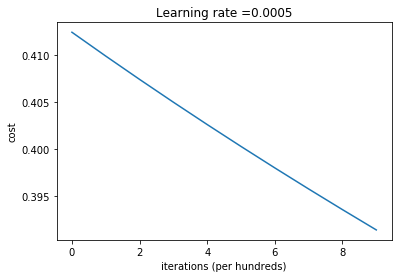

In [89]:
#2 hidden layers this time;
layers_dims = [28,15,10,1]
param_onn4 = L_layer_model(nnXtr, nnytr, layers_dims, num_iterations = 1000, learning_rate = .0005, print_cost = True, dynamic_lr=False,init=['custom',param_onn3])

In [101]:
predictions_test = predict(nnXtr,nnytr,param_onn4,threshold=0.88)
ypreds=predictions_test.T
yacts = nnytr.T
print("in-sample performance:")
print(ypreds.shape)
print(yacts.shape)
print(np.sum(ypreds))
print(np.sum(yacts))

#In-sample performance
f1 = f1_score(yacts,ypreds)
prec = precision_score(yacts,ypreds)
acc = accuracy_score(yacts,ypreds)
rec = recall_score(yacts,ypreds)
auc = roc_auc_score(yacts,ypreds)

nn_stats = ['FC-OS IS',acc,auc,prec,rec,f1]
table_headers = ['Model','Acc','AUC','Precision','Recall','F1 Score']

print(tabulate([nn_stats], headers=table_headers, tablefmt='orgtbl'))

Accuracy: 0.8560271072640954
in-sample performance:
(159662, 1)
(159662, 1)
56910.0
79831
| Model    |      Acc |      AUC |   Precision |   Recall |   F1 Score |
|----------+----------+----------+-------------+----------+------------|
| FC-OS IS | 0.856027 | 0.856027 |     0.99942 | 0.712468 |   0.831894 |


In [100]:
#out-of-sample performance
predictions_test2 = predict(nnXte,nnyte,param_onn4,threshold=0.88)
ypreds=predictions_test2.T
yacts = nnyte.T
print("OOS performance")
print(ypreds.shape)
print(yacts.shape)
print(np.sum(ypreds))
print(np.sum(yacts))
f1 = f1_score(yacts,ypreds)
prec = precision_score(yacts,ypreds)
acc = accuracy_score(yacts,ypreds)
rec = recall_score(yacts,ypreds)
auc = roc_auc_score(yacts,ypreds)

nn_stats = ['FC-OS OOS',acc,auc,prec,rec,f1]
table_headers = ['Model','Acc','AUC','Precision','Recall','F1 Score']

print(tabulate([nn_stats], headers=table_headers, tablefmt='orgtbl'))

Accuracy: 0.999403110845827
OOS performance
(56962, 1)
(56962, 1)
84.0
100
| Model     |      Acc |      AUC |   Precision |   Recall |   F1 Score |
|-----------+----------+----------+-------------+----------+------------|
| FC-OS OOS | 0.999403 | 0.874921 |    0.892857 |     0.75 |   0.815217 |


In [103]:
#OK, I kinda cheated by messing with the prediction threshold.  BUT we can see that the last oversampling method worked pretty well.
#the model would continue to improve if I trained it for a long time.

print("Overall I learned a lot about dealing with imbalanced data.")

Overall I learned a lot about dealing with imbalanced data.
